## Esame Metodi Numerici  4 Luglio 2024 - Turno I Ore 9

# Esercizio 1

Si consideri il sistema lineare:

     A  x = b 

dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare.
I dati di questo sistema lineare sono contenuti nel file **testI.mat**.

- Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input.
                                      **[punti 7]**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **[punti 2]**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

In [19]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from SolveTriangular import *
dati = loadmat('testI')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

In [8]:
n,m = A.shape
if m==n:
    print("matrice quadrata, dim:", m)
else:
    print("matrice non quadrata")
print("COndizionamento di A: ", np.linalg.cond(A))

matrice quadrata, dim: 400
COndizionamento di A:  398.0942877444178


Sparsità:  0.116775


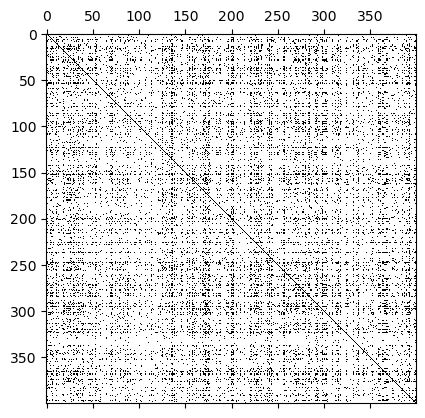

In [16]:
sp=np.count_nonzero(A)/(m*n)
print("Sparsità: ", sp)
plt.spy(A)

In [17]:
flagS= A==A.T
if np.all(flagS==True):
    print("matrice simmetrica")
else: 
    print("matrice non simmetrica")

matrice non simmetrica


In [18]:
def is_strictly_diagonally_dominant(A):
    for i in range(A.shape[0]):
        diag = abs(A[i, i])
        off_diag_sum = np.sum(np.abs(A[i, :])) - diag
        if diag <= off_diag_sum:
            return False
    return True

# Uso:
if is_strictly_diagonally_dominant(A):
    print("La matrice è diagonalmente strettamente dominante")
else:
    print("La matrice NON è diagonalmente strettamente dominante")

La matrice è diagonalmente strettamente dominante


In [ ]:

def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A, 1)
    F=np.triu(A,-1)
    N=-(E+F)
    T=invM@N 
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori)) 
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+N@x0)/d.reshap(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet


def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.linalg.inv(M)@N 
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore >=toll:
        x,flag=Lsolve(M, b-F@x0)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(d)
    D=np.diag(A) 
    E=np.tril(A,-1) 
    F=np.triu(A,1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.linalg.inv(Momega)@Nomega
    autovalori=np.linalg.eigvals(T)
    raggiospettrale= np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        
        xtilde,flag=Lsolve(M, b-F@xold) 
        xnew=(1-omega)*xold+omega*xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet



- Data la matrice
$$
\left[
\begin{array}{cccc}
3.0 &2.0 & 1.0 & -1.0\\
4.0 & 6.0 & 3.0 & 2.0\\
2.0 & 1.0 & 4.0 & 3.0\\
1.0 & 4.0 & 2.0 & 7.0
\end{array}
\right ],
$$
calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu e:
- sfruttarla per il calcolo del suo determinante (confrontare l'esattezza del calcolo con quello ottenuto usando la funzione numpy.linalg.det)             **[punti: 2]**
- sfruttarla per il calcolo della sua inversa risolvendo n sistemi lineari (confrontare l'inversa con quella ottenuta usando la funzione numpy.linalg.inv)
                                                                                                    **[punti: 2]**

## Esercizio 2

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare
                           [**punti: 7**]

- Risolvere il sistema di equazioni non lineare 

$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria. [**punti: 3**]

 **Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

- Descrivere teoricamente la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili.

 [**punti: 2**]
 



## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quali sono i passaggi fondamentali all’interno del paradigma generale dell’Intelligenza Artificiale?

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione e metriche

•	Data Processing, Addestramento del Modello, Predizione, Analisi economica dei risultati

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione, Test di Turing

•	Acquisizione dati, Addestramento del Modello, Test di Turing, Predizione


**2.** Per una rete neurale, l’apprendimento è legato a:

•	Minimizzare la funzione obiettivo

•	Minimizzare la funzione di attivazione

•	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation

•	Massimizzare il valore della funzione di training


**3.**  Il Test di Turing serve a:

•	Valutare se una macchina dimostra un comportamento intelligente

•	Valutare il carico computazionale di un algoritmo di Intelligenza Artificiale

•	Valutare la velocità di risposta di un algoritmo di Intelligenza Artificiale

•	Valutare se una macchina dimostra un comportamento predicibile


**4.**
Le ultime e più recenti innovazioni nel campo dell’Intelligenza Artificiale sono:

•	CNN, GAN e Transformers

•	Expert Systems, CNN e GAN

•	Expert Systems, Deep Learning e CNN

•	CNN, Expert Systems e Transformers


**5.** A cosa serve il validation set?

•	A trovare i migliori iperparametri del modello

•	Ad addestrare il modello 

•	A testare il modello

•	A trovare le etichette dei dati di input


**Domande aperte**

Quale è il ruolo del learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2]**


Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**